# Lectura y representación de datasets con Python
**Autor:** José A. Troyano    &nbsp;&nbsp;&nbsp; **Última modificación:** 22/05/2019

--------------------------------------------------------------------------
## Contenido
1. <a href="#estandar"> Lectura con la librería estándar y representación con listas </a> <br>
    1.1. <a href="#csv"> Lectura de CSVs </a> <br>
    1.2. <a href="#slicing"> Acceso a celdas y filas, y _slicing_  </a> <br>
    1.3. <a href="#columnas"> Acceso por columnas </a> <br>
2. <a href="#numpy"> Representación mediante arrays Numpy  </a> <br>
    2.1. <a href="lectura_numpy"> Lectura y acceso  </a> <br>
    2.2. <a href="#conversion"> Conversión de tipos  </a>  <br>
    2.3. <a href="#fancy"> _Fancy indexing_  </a>  <br>
    2.4. <a href="#arrays"> Operaciones con arrays  </a> <br>
    2.5. <a href="#combinacion_numpy"> Combinación de arrays  </a> <br>
3. <a href="#pandas"> Lectura y representación con Pandas  </a> <br>
    3.1. <a href="#series_dataframe"> Creación de objetos <code>Series</code> y <code>DataFrame</code>  </a> <br>
    3.2. <a href="#smart"> Acceso y _smart indexing_  </a> <br>
    3.3. <a href="#lectura_pandas"> Lectura de datasets  </a> <br>
    3.4. <a href="#combinacion_pandas"> Operaciones y combinación  </a> <br>
    3.5. <a href="#apply"> Métodos <code>apply</code> y <code>map</code>  </a> <br>
    3.6. <a href="#fechas"> Tratamiento de fechas  </a> <br>
-------------------------------------------------

## 1. Lectura con la librería estándar  y representación con listas <a name="estandar"> </a>

Usaremos directamente las funciones que proporciona la librería estándar de Python para leer ficheros <code>CSV</code>: 
- Los datos se representan mediante listas de listas
- Hay que realizar una conversión explícita de tipos
- El acceso por columnas es difícil con la representación de listas de listas

Trabajaremos con el dataset _bike_. Antes de empezar, echaremos un vistazo a los datos con un editor de textos planos, o con Excel:

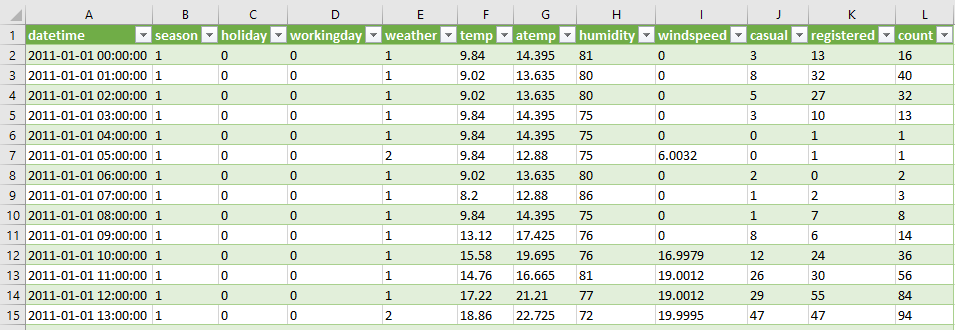

Y después importaremos el módulo <code>csv</code> para la lectura de los datos, y la función <code>mean</code> para el cálculo de la media:

In [1]:
import csv as csv
from statistics import mean

### 1.1. Lectura de CSVs <a name="csv"> </a>
En primer lugar, relizamos una lectura primitiva del csv, utilizando las librerías estándar de python.

In [2]:
# EJERCICIO: leer el fichero de datos './train-bike.csv' en una lista de listas de 'str'

DATOS_PY = []

with open("./train-bike.csv", 'r') as file:
    reader = csv.reader(file)
    header = next(reader)
    for row in reader:
        DATOS_PY.append(row)
        #DATOS_PY = [row for row in reader]
    


In [3]:
# TEST: de la operación de lectura
print(DATOS_PY[:10])

[['2011-01-01 00:00:00', '1', '0', '0', '1', '9.84', '14.395', '81', '0', '3', '13', '16'], ['2011-01-01 01:00:00', '1', '0', '0', '1', '9.02', '13.635', '80', '0', '8', '32', '40'], ['2011-01-01 02:00:00', '1', '0', '0', '1', '9.02', '13.635', '80', '0', '5', '27', '32'], ['2011-01-01 03:00:00', '1', '0', '0', '1', '9.84', '14.395', '75', '0', '3', '10', '13'], ['2011-01-01 04:00:00', '1', '0', '0', '1', '9.84', '14.395', '75', '0', '0', '1', '1'], ['2011-01-01 05:00:00', '1', '0', '0', '2', '9.84', '12.88', '75', '6.0032', '0', '1', '1'], ['2011-01-01 06:00:00', '1', '0', '0', '1', '9.02', '13.635', '80', '0', '2', '0', '2'], ['2011-01-01 07:00:00', '1', '0', '0', '1', '8.2', '12.88', '86', '0', '1', '2', '3'], ['2011-01-01 08:00:00', '1', '0', '0', '1', '9.84', '14.395', '75', '0', '1', '7', '8'], ['2011-01-01 09:00:00', '1', '0', '0', '1', '13.12', '17.425', '76', '0', '8', '6', '14']]


### 1.2. Acceso a celdas y filas, y _slicing_ <a name="slicing"> </a>
En primer lugar, estudiamos el acceso a celdas y filas.

In [4]:
# EJERCICIO: calcular las siguientes variables con distintas porciones del array de datos

#    - celda_1_2: contenido de la celda de la segunda fila y tercera columna (la primera posición es 0)
celda_1_2 = DATOS_PY[1][2]

#    - primera_fila: valores de todas las columnas para la primera fila del array
primera_fila = DATOS_PY[0] #<-- OJO: El primer índice es 0

In [5]:
# TEST: de las operaciones de acceso
print(celda_1_2)
print(primera_fila)

0
['2011-01-01 00:00:00', '1', '0', '0', '1', '9.84', '14.395', '81', '0', '3', '13', '16']


A continuación, estudiamos el slicing.

In [6]:
# EJERCICIO: calcular las siguientes variables con distintas porciones del array de datos
#    - primeras_2_filas: primeras dos filas
#    - filas_1_a_3: filas de la uno a la tres (inlcuida)
#    - ultimas_3_filas: últimas tres filas

primeras_2_filas = DATOS_PY[:2]
filas_1_a_3 = DATOS_PY[1:4] #<--OJO: El corchete es cerrado,abierto
ultimas_3_filas = DATOS_PY[-3:]

In [7]:
# TEST: de las operaciones de slicing
print(primeras_2_filas)
print(filas_1_a_3)
print(ultimas_3_filas)

[['2011-01-01 00:00:00', '1', '0', '0', '1', '9.84', '14.395', '81', '0', '3', '13', '16'], ['2011-01-01 01:00:00', '1', '0', '0', '1', '9.02', '13.635', '80', '0', '8', '32', '40']]
[['2011-01-01 01:00:00', '1', '0', '0', '1', '9.02', '13.635', '80', '0', '8', '32', '40'], ['2011-01-01 02:00:00', '1', '0', '0', '1', '9.02', '13.635', '80', '0', '5', '27', '32'], ['2011-01-01 03:00:00', '1', '0', '0', '1', '9.84', '14.395', '75', '0', '3', '10', '13']]
[['2012-12-19 21:00:00', '4', '0', '1', '1', '13.94', '15.91', '61', '15.0013', '4', '164', '168'], ['2012-12-19 22:00:00', '4', '0', '1', '1', '13.94', '17.425', '61', '6.0032', '12', '117', '129'], ['2012-12-19 23:00:00', '4', '0', '1', '1', '13.12', '16.665', '66', '8.9981', '4', '84', '88']]


### 1.3. Acceso por columnas <a name="columnas"> </a>
El procedimiento consiste en para cada fila del csv <code>DATOS_PY</code>, seleccionar la posición <code>i</code> de la fila, es decir, la columna <code>i</code>

In [8]:
# EJERCICIO: mostrar el máximo del atributo 'count' (hay que pasar de 'str' a 'int')

columna_count = [int(fila[11]) #<--Acceso a columna
                 for fila in DATOS_PY]

print(max(columna_count))

977


In [9]:
# EJERCICIO: mostrar la media del atributo ‘temp’ (hay que pasar de 'str' a 'float')

columna_temp = [float(fila[5]) #<--Acceso a columna
                for fila in DATOS_PY]

print(mean(columna_temp))

20.230859819952233


In [10]:
# EJERCICIO: mostrar la media del atributo ‘count’ para días festivos y no festivos  (hay que pasar de 'str' a 'int')

count_festivos = [int(fila[11]) #<-- acceso a columna
                  for fila in DATOS_PY 
                  if int(fila[2])==1] #<-- condición de filtrado

count_no_festivos = [int(fila[11]) #<-- acceso a columna
                     for fila in DATOS_PY 
                     if int(fila[2])==0]  #<-- condición de filtrado


print("Media de los días festivos:", mean(count_festivos))
print("Media de los días no festivos:", mean(count_no_festivos))

Media de los días festivos: 185.87781350482314
Media de los días no festivos: 191.7416548463357


### Conclusiones
Limitaciones de trabajar con la librería estándar de Python:
- Tipos numéricos
- Acceso a columnas complejo
- Nombres de columnas
- Filas no consecutivas

## 2. Representación mediante arrays Numpy <a name="numpy"> </a>

Es un paquete Python que da soporte para vectores y matrices. Es el estándar _de facto_ para el tratamiento de datos numéricos y se usa como base en muchas otras librerías de análisis de datos y cálculo científico. 

Proporciona:
- Acceso más cómodo a datos matriciales por filas y columnas
- Operaciones con matrices

Está incluido en Anaconda, por lo que no será necesario instalar nada para usarlo. La forma habitual de importarlo es:

In [11]:
import numpy as np

### 2.1. Lectura y acceso <a name="lectura_numpy"> </a>

En este caso, no vamos a leer de nuevo el archivo csv sino que vamos a utilizar la lista de listas que habíamos creado previamente <code>DATOS_PY</code> y la convertimos a un <code>np.array</code>

In [12]:
# EJERCICIO: convertir la lista de listas 'DATOS_PY' en un array numpy
DATOS_NP = np.array(DATOS_PY)

In [13]:
# TEST: de la operación de creación
print(DATOS_NP.shape)
print(DATOS_NP)

(10886, 12)
[['2011-01-01 00:00:00' '1' '0' ... '3' '13' '16']
 ['2011-01-01 01:00:00' '1' '0' ... '8' '32' '40']
 ['2011-01-01 02:00:00' '1' '0' ... '5' '27' '32']
 ...
 ['2012-12-19 21:00:00' '4' '0' ... '4' '164' '168']
 ['2012-12-19 22:00:00' '4' '0' ... '12' '117' '129']
 ['2012-12-19 23:00:00' '4' '0' ... '4' '84' '88']]


Ojo: 
- El método <code>.shape()</code> provee información importante del número de filas, número de columnas.
- Al imprimir un array np, si numpy detecta que el array es muy grande no muestra todo el array sino las primeras y últimas filas.

### Acceso a celdas y filas, y _slicing_ <a name="slicing"> </a>
Numpy facilita el acceso a celdas y filas mediante <code>[,]</code>, que era una de las limitaciones de la librería estándar de python.

In [14]:
# EJERCICIO: calcular las siguientes variables con distintas porciones del array de datos

#    - celda_1_2: contenido de la celda de la segunda fila y tercera columna (la primera posición es 0)
celda_1_2 = DATOS_NP[1,2]

#    - primera_fila: valores de todas las columnas para la primera fila del array
primera_fila = DATOS_NP[0,:]

#    - primera_columna: valores de la primera columna para todas las filas
primera_columna = DATOS_NP[:,0]

#    - datos_numericos: todos los datos menos la primera columna (que contiene una fecha)
datos_numericos = DATOS_NP[:, 1:] #<-- Me da todas las filas y las columnas empezando por la 1 (se salta la columna 0)

In [15]:
# TEST: de las operaciones de acceso
print(celda_1_2)
print(primera_fila)
print(primera_columna)
print(datos_numericos)

0
['2011-01-01 00:00:00' '1' '0' '0' '1' '9.84' '14.395' '81' '0' '3' '13'
 '16']
['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
[['1' '0' '0' ... '3' '13' '16']
 ['1' '0' '0' ... '8' '32' '40']
 ['1' '0' '0' ... '5' '27' '32']
 ...
 ['4' '0' '1' ... '4' '164' '168']
 ['4' '0' '1' ... '12' '117' '129']
 ['4' '0' '1' ... '4' '84' '88']]


### 2.2. Conversión de tipos <a name="conversion"> </a>
Para la conversión de tipos utilizaremos el método numpy de .astype()

In [16]:
# EJERCICIO: convertir los datos numéricos a float 

datos_numericos = datos_numericos.astype(float)

In [17]:
# TEST: de la función de conversión
print(datos_numericos)

[[  1.   0.   0. ...   3.  13.  16.]
 [  1.   0.   0. ...   8.  32.  40.]
 [  1.   0.   0. ...   5.  27.  32.]
 ...
 [  4.   0.   1. ...   4. 164. 168.]
 [  4.   0.   1. ...  12. 117. 129.]
 [  4.   0.   1. ...   4.  84.  88.]]


Algunos operadores son los siguientes:

In [18]:
# EJERCICIO: calcular sobre 'datos_numericos' los siguientes valores:
#    - max_count: el máximo del atributo 'count' (columna 10)
#    - med_temp: la media del atributo 'temp' (columna 4)

max_count = max([fila for fila  
                 in datos_numericos[:,10]])

med_temp = np.average([float(fila) for fila 
                      in datos_numericos[:,4]])

print(max_count)
print(med_temp)

977.0
20.23085981995223


La ejecución anterior da un resultado correcto, sin embargo, la implementación  es muy iterativa y no aprovecha realmente las ventajas del <code>[,]</code> de numpy. 

De hecho, es redundante, realizar esa iteración porque en <code>fila for fila</code> no se está haciendo ninguna modificación.

Podemos suprimir la iteración y aprovechar al máximo el poder numpy de la siguiente forma:

In [19]:
max_count = max(datos_numericos[:,10])
med_temp = np.average(datos_numericos[:,4])

In [20]:
# TEST: del cálculo de 'max_count' y 'med_temp'
print(max_count)
print(med_temp)

977.0
20.23085981995223


### 2.3. _Fancy indexing_ <a name="fancy"> </a>
 
Consiste en acceder a una porción de un array _numpy_ especificando los índices de las filas que se desean seleccionar. Se pueden espcificar los índices mediante:
- Una lista de números enteros
- Una lista de valores booleanos para todas las posiciones donde <code>True</code> indica que se desea seleccionar la fila, y <code>False</code> que no.

In [21]:
# EJERCICIO: calcular sobre 'datos_numericos' los siguientes valores:
#    - festivos: lista de booleanos (uno para cada fila de los datos), si el día es festivo 'True' y si no 'False'
#    - no_festivos: lista de booleanos (uno para cada fila de los datos), si el día es festivo 'False' y si no 'True'

festivos = datos_numericos[:,1]==1
no_festivos = datos_numericos[:,1]==0

Ojo que se está comparando una <code>lista [] == int</code>, sin embargo, lo importante es que np posibilita que en verdad la lista se esté iterando y se esté comparando cada elemento de la lista <code>i == int</code>.

Si el valor de la comparación es TRUE se lo queda y si el valor da FALSE no.

In [22]:
# TEST: del cálculo de 'festivos' y 'no_festivos'
print(festivos)
print(no_festivos)

[False False False ... False False False]
[ True  True  True ...  True  True  True]


Ahora vamos a hacer un filtrado doble, por <code>filas</code> y por <code>columnas</code>. Mira la facilidad con la que podemos filtrar por filas y columnas gracias a NP.

In [23]:
# EJERCICIO: calcular sobre 'datos_numericos', 'festivos' y 'no_festivos' los siguientes valores:
#    - count_festivos, count_no_festivos: valores de 'count' para los días festivos y no festivos
#    - med_count_festivos, med_count_no_festivos: media del atributo ‘count’ para días festivos y no festivos

count_festivos = datos_numericos[festivos, 10] #<---
count_no_festivos = datos_numericos[no_festivos, 10] #<---

med_count_festivos = np.average(count_festivos)
med_count_no_festivos = np.average(count_no_festivos)

In [24]:
# TEST: del cálculo de las medias de 'count' para festivos y no festivos
print(med_count_festivos)
print(med_count_no_festivos)

185.87781350482314
191.7416548463357


### 2.4. Operaciones con arrays <a name="arrays"> </a>

In [25]:
# EJERCICIO: calcular sobre 'datos_numericos' los siguientes valores:
#    - valores_season: valores distintos que toma el atributo 'season' (columna 0)
#    - frecs_season: número de veces que aparece cada uno de los valores anteriores
#    - dict_season: diccionario en el que las claves son los 'valores_season' y los valores las frecuencias correspondientes 



In [26]:
# TEST: del cálculo de los valores y frecuencias del atributo 'season'
print(valores_season)
print(frecs_season)
print(dict_season)

NameError: name 'valores_season' is not defined

Ojo a la facilidad para realizar operaciones entre columnas gracias a np:

In [ ]:
# EJERCICIO: calcular sobre 'datos_numericos' los siguientes valores:
#    - temp_wind: diferencia entre 'temp' (columna 4) y 'windspeed' (columna 7) para todas las filas
#    - temp_norm: valor normalizado de temp (dividido por el máximo) para todas las filas

temp_wind = datos_numericos[:,4] - datos_numericos[:,7]

temp_norm = datos_numericos[:,4]/max(datos_numericos[:,4])

In [ ]:
# TEST: del cálculo de 'temp_wind' y 'temp_norm'
print(temp_wind)
print(temp_norm)

### 2.5. Combinación de arrays <a name="combinacion_numpy"> </a>
Utilizamos el método <code>np.column_stack()</code> para construir la matriz aunque no lo utilizaremos más.

In [ ]:
# EJERCICIO: calcular sobre 'datos_numericos' la matriz 'tw_tn_count' con las siguientes columnas:
#    - temp_wind
#    - temp_norm
#    - valor del atributo 'count' para cada fila

count = datos_numericos[:,10]

tw_tn_count = np.column_stack((temp_wind,temp_norm, count))


In [ ]:
# TEST: del cálculo de la matriz 'tw_tn_count'
print(tw_tn_count.shape)
print(tw_tn_count)

In [ ]:
# EJERCICIO: calcular una matriz con los datos numéricos de los datasets 'train-bike.csv' y 'test-bike.csv'. 
# No se incluirán las columnas 'count', 'casual' y 'regsitered' ya que no están disponibles en el dataset de test.


#datos_numericos_train_test = np.column_stack(datos_numericos[:,-3]) <-- Ojo: En este caso 
#                                                                        solo hubiera cogido la tercera empezando por el final

datos_numericos_train_test = np.column_stack(datos_numericos[:,
                                                             :-3])  #<-- Check: Coge las columnas empezando 
#                                                                        por la primera hasta las tercera última


In [ ]:
# TEST: del cálculo de la matriz con los datasets de train y test
print(datos_numericos_train_test.shape)
print(datos_numericos_train_test)

### Conclusiones
Numpy...
- Nos permite acceder a filas y columnas de forma más sencilla.
- En el acceso a elementos del np.array se permite hacer la comparación entre vectores booleanos para seleccionar/deseleccionar elementos.
- Se extienden los operadores de suma, resta, multiplicación y división entre distintos tipos.

## 3. Lectura y representación con Pandas <a name="pandas"> </a>

Pandas es una librería desarrollada sobre Numpy para la manipulación y análisis de datos. Proporciona, entre otras cosas, dos estructuras para representar datos: 
- <code>Series</code> para datos vectoriales
- <code>DataFrame</code> para datasets

Importaremos pandas de la siguiente forma:

In [27]:
import pandas as pd

### 3.1. Creación de objetos <code>Series</code> y <code>DataFrame</code> <a name="series_dataframe"> </a>
Empezamos creando dos series.
Las series están indexadas y están ordenadas. Cualquier tipo puede ser índice de una serie siempre que sea inmutable.

In [28]:
# EJERCICIO: crear dos series con los números del 1 al 5
#    - numeros: con el índice por defecto

numeros = pd.Series(range(1,6))
numeros

0    1
1    2
2    3
3    4
4    5
dtype: int64

Ojo: Se muestra índice - valor

In [29]:
#    - numeros_ix_ch: usando como índices las vocales = ['a', 'e', 'i', 'o', 'u']

numeros_ix_ch = pd.Series(range(1,6),
                          index=['a', 'e', 'i', 'o', 'u']) 

numeros_ix_ch

a    1
e    2
i    3
o    4
u    5
dtype: int64

Ahora vamos a trabajar con DataFrames.

In [30]:
# EJERCICIO: crear dos dataframes de la siguiente matriz de números aleatorios 'np.random.rand(10,3)'
#    - df: sin especificar nombres de columnas
#    - df_col: usando como nombres de columnas ['C1', 'C2', 'C3']
df = pd.DataFrame(np.random.rand(10,3))

df_col = pd.DataFrame(np.random.rand(10,3),
                      columns=['C1', 'C2', 'C3'], 
                      #index=[1,2,3,4,5,6,7,8,9,10] -- también se podría modificar el índice
                     )

In [31]:
# TEST: de la creación de dataframes
print(df)
print(df_col)

          0         1         2
0  0.868293  0.356579  0.955128
1  0.188053  0.452273  0.293317
2  0.660964  0.706475  0.837278
3  0.866503  0.399821  0.974356
4  0.853045  0.065579  0.843787
5  0.962557  0.838136  0.351613
6  0.696817  0.149057  0.696082
7  0.115872  0.614031  0.415211
8  0.163683  0.426426  0.279845
9  0.649460  0.825174  0.919561
         C1        C2        C3
0  0.362610  0.969827  0.616385
1  0.344387  0.177303  0.555170
2  0.088487  0.806780  0.904974
3  0.759530  0.179820  0.655207
4  0.741568  0.321953  0.925815
5  0.540777  0.866912  0.211310
6  0.356112  0.451990  0.175108
7  0.332991  0.388559  0.606924
8  0.263374  0.683913  0.572475
9  0.897458  0.980393  0.150504


### 3.2. Acceso y _smart indexing_ <a name="smart"> </a>
Ojo: Gracias a pandas, ahora podemos acceder a elementos de una serie/df según la etiqueta que hemos asignado como índice.

In [37]:
# EJERCICIO: mostrar el resultado de las siguientes consultas sobre series

#    - elemento 0 de la serie 'numeros'
print("A:", numeros[0], "\n")

#    - serie con los elementos 1-3 de la serie 'numeros'
print("B:", numeros[1:4], "\n")

#    - elemento de la serie 'numeros_ix_ch' indexado con el carácter 'e'
print("C:", numeros_ix_ch['e'], "\n")

#    - serie con los elementos de la serie 'numeros' que sean mayores que 3
print("D:", numeros[numeros>3], "\n")
    


A: 1 

B: 1    2
2    3
3    4
dtype: int64 

C: 2 

D: 3    4
4    5
dtype: int64 



Los siguientes métodos no son recomendados porque recorren el dataframe de forma secuencial. De hecho, están deprecados.

In [35]:
# EJERCICIO: mostrar el resultado de las siguientes consultas sobre dataframes

#    - fila 3 del dataframe 'df'
#    - fila 3 del dataframe 'df_col'
print(df.iloc[3])
print(df_col.iloc[3])

#    - columna 1 de la fila 3 del dataframe 'df'
#    - columna 'C1' del dataframe df_col <-- Importante

print(df.iloc[:, 1])         #<--- Ojo: .iloc se usa para acceder al índice numeral por defecto
print(df_col.loc[:,'C1'])    #<--- Ojo: .loc se usa para acceder a la etiqueta de índice

0    0.866503
1    0.399821
2    0.974356
Name: 3, dtype: float64
C1    0.759530
C2    0.179820
C3    0.655207
Name: 3, dtype: float64
0    0.356579
1    0.452273
2    0.706475
3    0.399821
4    0.065579
5    0.838136
6    0.149057
7    0.614031
8    0.426426
9    0.825174
Name: 1, dtype: float64
0    0.362610
1    0.344387
2    0.088487
3    0.759530
4    0.741568
5    0.540777
6    0.356112
7    0.332991
8    0.263374
9    0.897458
Name: C1, dtype: float64


Lo verdaderamente importante es la última consulta porque al fin se permite gestionar el acceso a columnas de la forma más eficiente. 
Pues podemos acceder a las columnas mediante etiquetas que le hemos establecido previamente.

In [51]:
# EJERCICIO: mostrar el resultado de los siguientes consultas sobre dataframes

#    - dataframe compuesto por las columnas 'C1' y 'C3' del dataframe 'df_col'
print(df_col.loc[:,['C1','C3']], "\n")

#    - dataframe compuesto por las filas del dataframe 'df_col' cuyo valor de 'C2' sea mayor que 0.5
condition = df_col.loc[:,'C2']>0.5
print(df_col.loc[condition], "\n")

#    - dataframe compuesto por las columnas 'C1' y 'C3', con las filas cuyo valor de 'C2' sea mayor que 0.5
print(df_col.loc[df_col.loc[:,'C2']>0.5, 
                ['C1','C3']], '\n')

#    - dataframe con todas las columnas y con las filas en las que 'C2' sea mayor que 0.5 y 'C3' sea menor que 0.5
condition = (df_col.loc[:, 'C2']>0.5) & (df_col.loc[:, 'C3']<0.5)
print(df_col.loc[condition])


         C1        C3
0  0.362610  0.616385
1  0.344387  0.555170
2  0.088487  0.904974
3  0.759530  0.655207
4  0.741568  0.925815
5  0.540777  0.211310
6  0.356112  0.175108
7  0.332991  0.606924
8  0.263374  0.572475
9  0.897458  0.150504 

         C1        C2        C3
0  0.362610  0.969827  0.616385
2  0.088487  0.806780  0.904974
5  0.540777  0.866912  0.211310
8  0.263374  0.683913  0.572475
9  0.897458  0.980393  0.150504 

         C1        C3
0  0.362610  0.616385
2  0.088487  0.904974
5  0.540777  0.211310
8  0.263374  0.572475
9  0.897458  0.150504 

         C1        C2        C3
5  0.540777  0.866912  0.211310
9  0.897458  0.980393  0.150504


### 3.3. Lectura de datasets <a name="lectura_pandas"> </a>
La librería panda tiene implementado un lector de csv que facilita la lectura del csv de forma automática:
- Salta la primera línea de la cabecera
- Interpreta automáticamente las etiquetas de las columnas según la cabecera
- Parsea los distintos tipos que se encuentran en el csv

In [52]:
# EJERCICIO: leer el fichero de datos './train-bike.csv' en un dataframe
DATOS_PD = pd.read_csv('./train-bike.csv')

In [53]:
# TEST: de la operación de lectura
DATOS_PD

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [65]:
# EJERCICIO: probar los métodos de los dataframes para las siguientes operaciones:

#    - Mostrar información sobre las columnas
print(DATOS_PD.info(), '\n')

#    - Mostrar indicadores estadísticos sobre las columnas
print(DATOS_PD.describe(), '\n')

#    - Mostrar los tipos de las columnas
print(DATOS_PD.dtypes, '\n')


#    - Obtener una matriz numpy con los valores de los datos
print(DATOS_PD.values, '\n')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None 

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        

### 3.4. Operaciones y combinación <a name="combinacion_pandas"> </a>

In [67]:
# EJERCICIO: realizar las siguientes consultas sobre el dataframe con los datos de bike
#    - contar cuántas ocurrencias de cada valor del atributo season hay en el dataset.
print(DATOS_PD['season'].value_counts(), '\n')

#    - dividir el rango de valores de temp en diez partes y calcular cuántos elementos hay en cada uno de esos segmentos. 
print(pd.cut(DATOS_PD['temp'], bins=10).value_counts())

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64 

temp
(24.928, 28.946]    1901
(12.874, 16.892]    1891
(20.91, 24.928]     1753
(16.892, 20.91]     1587
(8.856, 12.874]     1440
(28.946, 32.964]    1194
(4.838, 8.856]       648
(32.964, 36.982]     355
(0.78, 4.838]         69
(36.982, 41.0]        48
Name: count, dtype: int64


In [149]:
# Método útil: value_counts()
DATOS_PD['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [84]:
# EJERCICIO: realizar las siguientes consultas sobre el dataframe con los datos de bike

#    - crear un atributo temp_wind que se calcule mediante la diferencia entre temp y windspeed.
DATOS_PD['temp_wind'] = DATOS_PD['temp']- DATOS_PD['windspeed']
print(DATOS_PD['temp_wind'])

#    - normalizar (de 0 a 1) las columnas season y weather guardándolas en las columnas 'season_norm' y 'weather_norm'.
DATOS_PD['season_norm'] = DATOS_PD['season']/max(DATOS_PD['season'])
print(DATOS_PD['season_norm'])

0         9.8400
1         9.0200
2         9.0200
3         9.8400
4         9.8400
          ...   
10881   -10.4227
10882    -0.2413
10883    -1.0613
10884     7.9368
10885     4.1219
Name: temp_wind, Length: 10886, dtype: float64
0        0.25
1        0.25
2        0.25
3        0.25
4        0.25
         ... 
10881    1.00
10882    1.00
10883    1.00
10884    1.00
10885    1.00
Name: season_norm, Length: 10886, dtype: float64


In [89]:
# EJERCICIO: crear un dataframe con los atributos weather y humidity, con los registros de los datasets train y test.
# concat

DATOS_TEST_PD = pd.read_csv('./test-bike.csv')

DATOS_PD_wh = DATOS_PD[['weather', 'humidity']]
DATOS_TEST_PD_wh = DATOS_TEST_PD[['weather', 'humidity']]

NUEVO_DF = pd.concat([DATOS_PD_wh, DATOS_TEST_PD_wh ])

print(NUEVO_DF[:10])

   weather  humidity
0        1        81
1        1        80
2        1        80
3        1        75
4        1        75
5        2        75
6        1        80
7        1        86
8        1        75
9        1        76


### 3.5 Métodos <code>apply</code> y <code>map</code> <a name="apply"> </a>

In [92]:
# EJERCICIO: segmentar el atributo 'temp' usando la función calcula_level que devuelve los siguientes valores:
#      'T1' para temperaturas menores a 15
#      'T2' para temperaturas mayores o iguales que 15 y menores que 30
#      'T3' para temperaturas mayores o iguales que 30

def calcula_level(temp):
    if temp<15:
        return('T1')
    elif temp<30:
        return('T2')
    else:
        return('T3')

DATOS_PD['temp_level'] = DATOS_PD['temp'].apply(calcula_level)
print(DATOS_PD['temp_level'][:10])

0    T1
1    T1
2    T1
3    T1
4    T1
5    T1
6    T1
7    T1
8    T1
9    T1
Name: temp_level, dtype: object


In [ ]:
# EJERCICIO: convertir el atributo temp_level en el atributo numérico temp_code que toma los valores 1, 2 y 3 (usando map)


### 3.6. Tratamiento de fechas <a name="fechas"> </a>

In [94]:
# EJERCICIO: volver a leer el dataset train analizando los datos tipo fecha y generar dos nuevas columnas:
#    - dia: con el día de la fecha
#    - mes: con el mes de la fecha

DATOS_PD = pd.read_csv('./train-bike.csv', parse_dates=['datetime'])
DATOS_PD['dia'] = DATOS_PD['datetime'].dt.day
DATOS_PD['mes'] = DATOS_PD['datetime'].dt.month
print(DATOS_PD[['dia','mes']][:10])



   dia  mes
0    1    1
1    1    1
2    1    1
3    1    1
4    1    1
5    1    1
6    1    1
7    1    1
8    1    1
9    1    1
